In [225]:
#basic lib imports
import pandas as pd
import os.path as path
import numpy as np

#sklearn imports (model lib)
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit, train_test_split

#plotting lib
import matplotlib.pyplot as plt

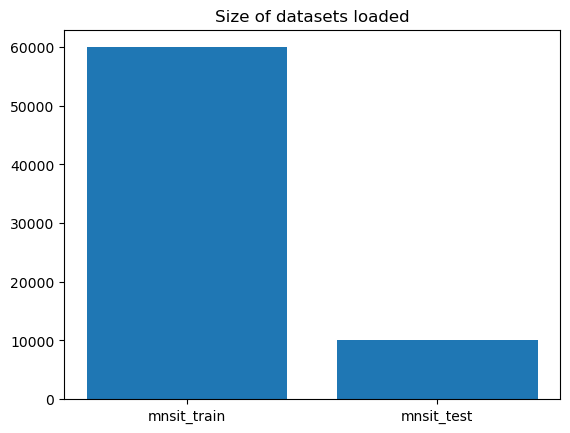

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
count,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,4.453933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,2.889270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.0000,0.0,0.0,0.0,0.0


In [226]:
#loading datasets
data_train = pd.read_csv(path.relpath("../data/mnist_train.csv"), header=None)
data_test = pd.read_csv(path.relpath("../data/mnist_test.csv"), header=None)

#plotting for checking loading
fig, ax = plt.subplots()

datasets_names = ("mnsit_train", "mnsit_test")
counts = (len(data_train), len(data_test))
ax.bar(datasets_names, counts)
ax.set_title('Size of datasets loaded')

plt.show()
data_train.describe()

In [227]:
#analyze dataset
#data_train.describe()
n_pixel = data_train.columns #labels
pixel = np.array(data_train.loc[:, 1:].values) #pixels


#plt.scatter(np.count_nonzero(pixel.flat), np.count_nonzero(pixel.flat))
#plt.show()

In [228]:
#Set train X and Y values
X_train = np.array(data_train.loc[:, 1:].values)
Y_train = np.array(data_train.loc[:, 0].values)

#Gaussian Naive Bayes SciKit Model
gnb = GaussianNB()
classifier = gnb.fit(X_train, Y_train)

KeyboardInterrupt: 

In [ ]:
#Set test X and Y values5
X_test = np.array(data_test.loc[:, 1:].values)
Y_test = np.array(data_test.loc[:, 0].values)

#Create predicit results with tests
y_pred = classifier.predict(X_test)

- Números de classes preditas de forma errada
4442 de 10000

- Matriz de confusão:
[[ 870    0    3    5    2    5   31    1   35   28]
 [   0 1079    2    1    0    0   10    0   38    5]
 [  79   25  266   91    5    2  269    4  271   20]
 [  32   39    6  353    2    3   51    8  409  107]
 [  19    2    5    4  168    7   63    7  210  497]
 [  71   25    1   20    3   44   40    2  586  100]
 [  12   12    3    1    1    7  895    0   26    1]
 [   0   15    2   10    5    1    5  280   39  671]
 [  13   72    3    7    3   11   12    4  648  201]
 [   5    7    3    6    1    0    1   13   18  955]] 

- Índices da classificação:
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       980
           1       0.85      0.95      0.90      1135
           2       0.90      0.26      0.40      1032
           3       0.71      0.35      0.47      1010
           4       0.88      0.17      0.29       982
           5       0.55      0.

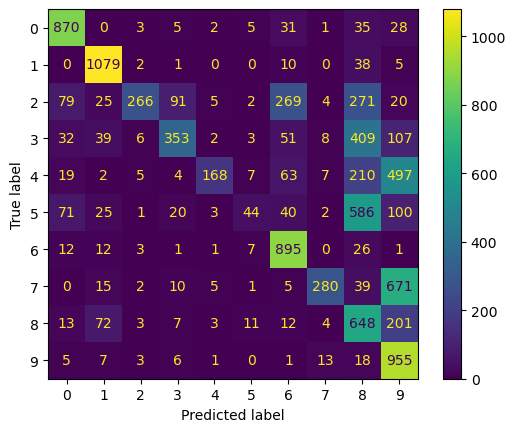

In [ ]:
#Analyze results
def analyze(Y_test, y_pred):
    print("- Números de classes preditas de forma errada")
    print("%d de %d\n" % ((Y_test != y_pred).sum(), X_test.shape[0]))

    print("- Matriz de confusão:")
    c_matrix = confusion_matrix(Y_test, y_pred, labels=np.array([0,1,2,3,4,5,6,7,8,9]) )
    print(c_matrix, "\n")

    print("- Índices da classificação:")
    print(classification_report(Y_test, y_pred))

    print("- Taxa de erro da classificação por classe:")
    k = 0
    e_matrix = [] #matriz da taxa de erro
    for i in c_matrix:
        rights = i[k]
        total = i.sum()
        e_matrix.append( 100 * ( (total - rights)/total) )
        k += 1
    print(e_matrix)
    
    disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=gnb.classes_)
    disp.plot()
analyze(Y_test, y_pred)

In [231]:
#Applying probability Calibration

X_clf_train, X_cfl_validation, y_cfl_train, y_cfl_validation = train_test_split(X_train, Y_train, test_size = 0.3)

calibrated_clf = CalibratedClassifierCV(gnb, cv=3)
calibrated_clf.fit(X_clf_train, y_cfl_train)
calibrated_clf.predict_proba(X_clf_train)[:2, :]



array([[0.01084831, 0.00889616, 0.08917744, 0.07407925, 0.0986871 ,
        0.10530246, 0.00883534, 0.08904654, 0.06674904, 0.44837835],
       [0.00748327, 0.61922809, 0.06148391, 0.05115493, 0.06803423,
        0.07260827, 0.0060944 , 0.06142864, 0.04602165, 0.00646262]])

In [232]:
y_pred_clf = calibrated_clf.predict(X_cfl_validation)

- Números de classes preditas de forma errada
7801 de 10000

- Matriz de confusão:
[[1649    2   14    3    3    5   42    1   20   33]
 [   4 1930    4   13    3    4   20    0   32   20]
 [ 233   67  537  170    7    4  445    9  299   29]
 [ 185  127   10  824    5    1   87   23  406  196]
 [  75   25   19    4  309   14  247   10  234  840]
 [ 304   56    9   55    6  101  120    3  759  172]
 [  25   43    7    1    1   10 1598    0   17    2]
 [  12   18    1   21   17    2    7  663   29 1157]
 [  49  321   10   21    7   11   51    3  893  370]
 [  17   24    5    2    8    0    3   27   24 1695]] 

- Índices da classificação:
              precision    recall  f1-score   support

           0       0.65      0.93      0.76      1772
           1       0.74      0.95      0.83      2030
           2       0.87      0.30      0.44      1800
           3       0.74      0.44      0.55      1864
           4       0.84      0.17      0.29      1777
           5       0.66      0.

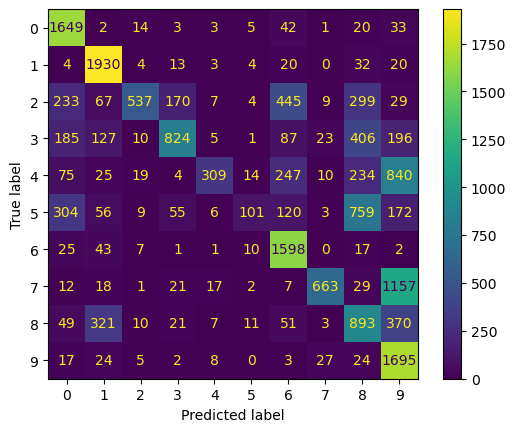

In [233]:
analyze(y_cfl_validation, y_pred_clf)

In [234]:
#Compare ajusted Gaussian NB and not ajusted Gaussian NB by learning curve

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharey=True)

common_params = {
    "X": X_train,
    "y": Y_train,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

for ax_idx, estimator in enumerate([gnb, calibrated_clf]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Validation Score"])
    ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")

: 